In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def find_npy_file(path, file, band):
    """
    Returns the string name of another file from the same time for a given GOES band npy file,
    or None if there is no such file in the given directory.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    
    Parameter band: GOES band the returned file should be from
    Precondition: band is a string of length 2
    """
    for x in os.listdir(path):
        if x[19:21] == band and file[23:37]==x[27:41]:
            return x

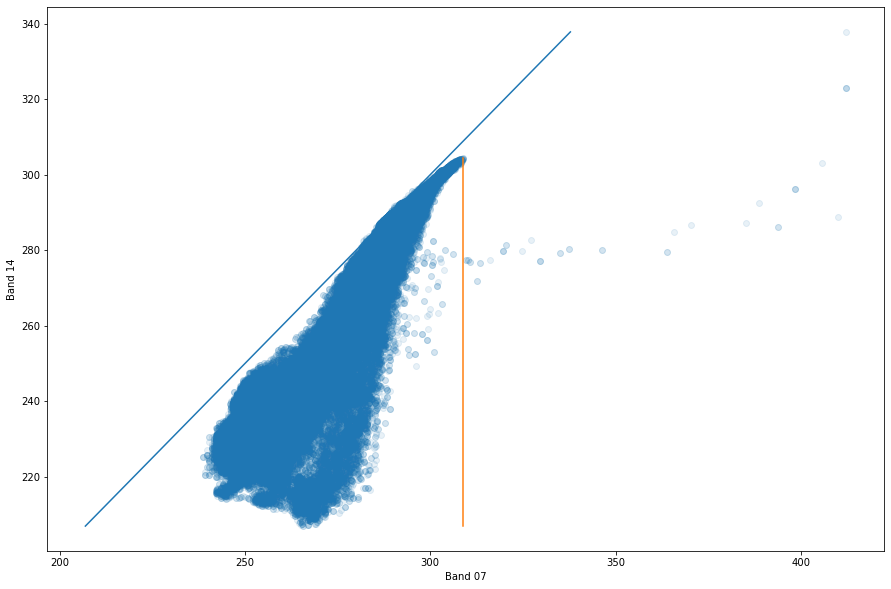

In [53]:
path = '../../GOES_Files/npy_files/'
pathCM = '../../GOES_Files/clear_sky_mask/'
CM = 'OR_ABI-L2-ACMC-M6_G17_s20203222311177_e20203222313550_c20203222314230.npy'
file07 = None
file14 = None
while file07 == None or file14 == None:
    file07 = find_npy_file(path, CM, '07')
    file14 = find_npy_file(path, CM, '14')

img07 = np.load(path + file07)
img14 = np.load(path + file14)

fig, ax = plt.subplots(1, figsize=(15, 10))
plt.scatter(img07, img14, alpha=0.1)
    
plt.plot([img14.min(), img14.max()], [img14.min(), img14.max()], label='x=y')
# plt.plot([img07[np.argmax(img14)//500, np.argmax(img14) % 500], img07[np.argmax(img14)//500, np.argmax(img14) % 500]], 
#            [img14.min(), img14.max()], label='fires')
maxs = firemin(img07, img14)
plt.plot([max07, maxs[0]], [img14.min(), maxs[1]], label='fires')
plt.xlabel('Band 07')
plt.ylabel('Band 14')

plt.show()

In [51]:
def firemin(img07, img14):
    max07 = 0
    max14 = 0
    img07ravel = img07.ravel()
    img14ravel = img14.ravel()
    for x in range(500*500):
        if img14ravel[x] > max14 and img14ravel[x] - img07ravel[x] < 5 and img14ravel[x] - img07ravel[x] > -5:
            max07 = img07ravel[x]
            max14 = img14ravel[x]
    return max07, max14